## Imports

In [28]:
import numpy as np
import tensorflow as tf
from os import listdir
import cv2 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.backend.tensorflow_backend import set_session
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# The proof is in the pudding... Checking if TF is running on my GPU or CPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2498619956445348742
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6696213545
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6529009566492182273
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
# This code solution from https://github.com/keras-team/keras/issues/4161 -- it will allow my GPU to dynamically
# grow its memory and not crash when fitting my models.
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

## Functions

In [4]:
# This code inspired by muliple different CV2 uses on Stackoverflow and Kaggle
image_size = tuple((128, 128)) #Specify what size you want your images to be here
# The following function will convert all my images to arrays
def arrayify(image_directory):
    try:
        image = cv2.imread(image_directory) # This will read in an image from the image directory
        if image is not None: #If the image exists, do the following:
            image = cv2.resize(image, image_size) # Resize the image to whatever image_size is defined as
            return img_to_array(image)
        else:
            return np.array([]) #Else... return an empty array (doing this mostly to prevent NaNs
                                # and other forms of data implosion)
    except Exception: #If there is an error...
        print (f"Nope!! {Exception}") #Let me know
        return None 

In [5]:
# This code inspired by multiple different instances and examples of image preprocessing on
# Stackoverflow, Kaggle, and from General Assembly lesson examples
def process_images(image_directory): 
    #Let's instantiate some lists!
    image_list = []
    label_list = []
    try:
        print("Loading Images ༼ つ ◕_◕ ༽つ")
        actual_folder = listdir(image_directory) # listdir will give me the directory for every folder
            # in the given directory, I can then use these directories in my function
        for folder in actual_folder:  
            if folder == ".DS_Store": #I don't want .DS_Store to be called for this function
                actual_folder.remove(folder)
        for image_folder in actual_folder: # For each specific image folder in the main folder...
            print(f"Processing {image_folder}...")
            formatted_image_list = listdir(f"{image_directory}/{image_folder}/") #Pull the images out and put them in a list
            for image in formatted_image_list: #For each image in the image list
                if image == ".DS_Store":
                    formatted_image_list.remove(image)
            for image in formatted_image_list:
                specific_image = f"{image_directory}/{image_folder}/{image}" #Create a specific image
                # Variable
                if specific_image.lower().endswith(".jpg") == True: #So long as the directory ends with
                    # .jpg, do the following
                    resized_array = arrayify(specific_image) # call the arrayify function on the image
                    image_list.append(resized_array) # append the resized array to the image_list var
                    label_list.append(image_folder) # Add the folder that the image came from as its "label"
        print("Processing Complete")
        return image_list, label_list
                    
                
                
                
                    
    except: #If there is an error...
        print (f"Nope!! {Exception}") #Let me know
        return None 

## Processing Image Directories

In [6]:
plant_village_arrays, plant_village_labels = process_images("./Images/PlantVillage")

Loading Images ༼ つ ◕_◕ ༽つ
Processing Pepper__bell___Bacterial_spot...
Processing Pepper__bell___healthy...
Processing Potato___Early_blight...
Processing Potato___healthy...
Processing Potato___Late_blight...
Processing Tomato_Bacterial_spot...
Processing Tomato_Early_blight...
Processing Tomato_healthy...
Processing Tomato_Late_blight...
Processing Tomato_Leaf_Mold...
Processing Tomato_Septoria_leaf_spot...
Processing Tomato_Spider_mites_Two_spotted_spider_mite...
Processing Tomato__Target_Spot...
Processing Tomato__Tomato_mosaic_virus...
Processing Tomato__Tomato_YellowLeaf__Curl_Virus...
Processing Complete


In [7]:
print(f"Processed {len(plant_village_arrays)} Images from the Plantvillage Dataset, Size {image_size}")
print(f"Labels for the Plantvillage Dataset are as follows: \n {set(plant_village_labels)}")

Processed 20636 Images from the Plantvillage Dataset, Size (128, 128)
Labels for the Plantvillage Dataset are as follows: 
 {'Pepper__bell___healthy', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Potato___healthy', 'Potato___Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Late_blight', 'Tomato__Tomato_mosaic_virus'}


In [8]:
rice_arrays, rice_labels = process_images('./Images/Rice')

Loading Images ༼ つ ◕_◕ ༽つ
Processing rice_Brown_Spot...
Processing rice_Healthy...
Processing rice_Hispa...
Processing rice_Leaf_Blast...
Processing Complete


In [9]:
print(f"Processed {len(rice_arrays)} Images from the Rice Dataset, Size {image_size}")
print(f"Labels for the Rice Dataset are as follows: \n {set(rice_labels)}")

Processed 3355 Images from the Rice Dataset, Size (128, 128)
Labels for the Rice Dataset are as follows: 
 {'rice_Healthy', 'rice_Leaf_Blast', 'rice_Brown_Spot', 'rice_Hispa'}


In [10]:
# Combining my Arrays and Labels
combined_arrays = plant_village_arrays + rice_arrays
combined_labels = plant_village_labels + rice_labels

In [11]:
len(combined_labels)

23991

In [12]:
labels_bin = []
for label in combined_labels:
    if label.lower().endswith("healthy"):
        label = 0
        labels_bin.append(label)
        
    else:
        label = 1
        labels_bin.append(label)
        
len(labels_bin)

23991

## Binary CNN with combined Image Datasets

In [13]:
# Defining my X and y vars
X = combined_arrays
y = labels_bin

In [14]:
# Train test split!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42)

In [15]:
# Converting X_train and X_test into float arrays so they can be normalized
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

In [16]:
# Normalizing X_train and X_test
X_train /= 255
X_test /= 255

In [17]:
# Transformed Image Size is what determines these variables 
width = 128
height = 128
depth = 3

# Model Instantiation
model = Sequential()

# Input
model.add(Conv2D(32, (3,3), input_shape = (width, height, depth)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

# Second Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.25))

# Third Layer
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten It
model.add(Flatten())

# Fourth Layer 
model.add(Dense(128))
model.add(Activation("relu"))

#Fifth Layer
model.add(Dense(64))
model.add(Activation("relu"))

# Final Output Layer
model.add(Dense(1))
model.add(Activation("sigmoid"))


# Compile the Model
model.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])


W0824 21:47:05.616756  3692 deprecation_wrapper.py:119] From C:\Users\JoeRo\Anaconda3\envs\keras_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 21:47:05.618752  3692 deprecation_wrapper.py:119] From C:\Users\JoeRo\Anaconda3\envs\keras_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 21:47:05.636703  3692 deprecation_wrapper.py:119] From C:\Users\JoeRo\Anaconda3\envs\keras_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 21:47:05.668616  3692 deprecation_wrapper.py:119] From C:\Users\JoeRo\Anaconda3\envs\keras_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0824 21:47:05.6716

In [18]:
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    epochs=25, 
                    verbose=1)

Train on 19192 samples, validate on 4799 samples
Epoch 1/25
19192/19192 [==============================] - 34s 2ms/step - loss: 0.3534 - acc: 0.8343 - val_loss: 0.2197 - val_acc: 0.8883
Epoch 2/25
19192/19192 [==============================] - 20s 1ms/step - loss: 0.2134 - acc: 0.8951 - val_loss: 0.1575 - val_acc: 0.9214
Epoch 3/25
19192/19192 [==============================] - 20s 1ms/step - loss: 0.1733 - acc: 0.9173 - val_loss: 0.1467 - val_acc: 0.9296
Epoch 4/25
19192/19192 [==============================] - 20s 1ms/step - loss: 0.1518 - acc: 0.9287 - val_loss: 0.1433 - val_acc: 0.9256
Epoch 5/25
19192/19192 [==============================] - 20s 1ms/step - loss: 0.1340 - acc: 0.9361 - val_loss: 0.1575 - val_acc: 0.9239
Epoch 6/25
19192/19192 [==============================] - 20s 1ms/step - loss: 0.1106 - acc: 0.9477 - val_loss: 0.1345 - val_acc: 0.9262
Epoch 7/25
19192/19192 [==============================] - 20s 1ms/step - loss: 0.1092 - acc: 0.9477 - val_loss: 0.2050 - val_acc:

## Analysis
- I am VERY happy with this binary score. What this is telling me is that my NNs are able to pretty accurately report whether or not a plant is healthy or sick. 

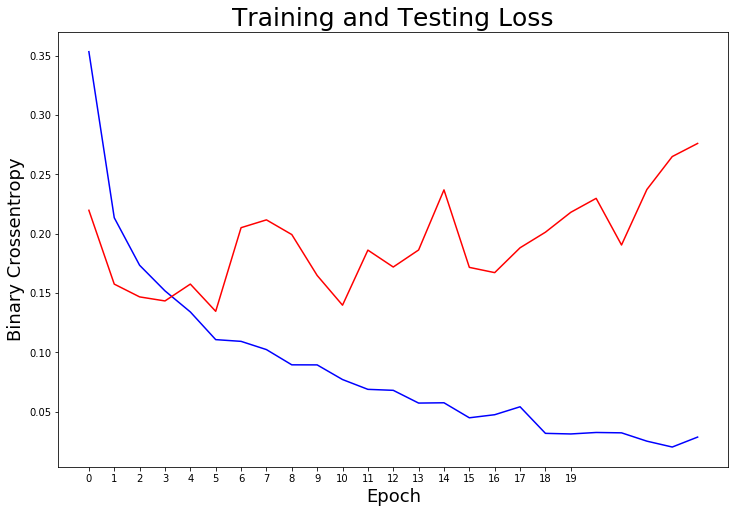

In [34]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='b')
plt.plot(test_loss, label='Testing Loss', color='r')

# Set title
plt.title('Training and Testing Loss', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(20));
